# Data Visualization

In this notebook you will be able to practice Univariate and Bivariate & Multivariate visualization techniques you've seen in the course materials.

## Table of contents

[A. Loading Libraries](#loading)

[B. Gathering Data](#gathering)
  
[C. Univariate Exploration](#uni)
  * [1. Bar Charts](#bar)

  * [2. Pi Charts](#pie)
  
  * [3. Histograms](#hist)
  
[D. Bivariate Exploration](#bi)
  * [1. Scatter Plots](#scatter)

  * [2. Heat Maps](#heat)
  
  * [3. Violin Plots](#violin)
  
  * [4. Box Plots](#box)
  
  * [5. Clustered Bar Charts](#clusters)
  
  * [6. Faceting](#faceting)
  
  * [7. Adaptation of Univariate Plots](#adapt)
  
  * [8. Line Plots](#line)
  
[E. Multivariate Exploration](#multi)
  * [1. Non Positional Encodings](#np)

  * [2. Color Palettes](#color)
  
  * [3. Faceting](#mfaceting)
  
  * [4. Other Adaptations of Bivariate Plots](#adaptBi)
  
  * [5. Plot Matrices](#matrices)


<a id='loading'></a>
## A. Loading Libraries

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='gathering'></a>
## B. Gathering Data

For **Univariate exploration**, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

[Download the Pokemon csv file](https://video.udacity-data.com/topher/2020/October/5f8535b7_pokemon/pokemon.csv)

For **Bivariate exploration**, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

[Download the Fuel_econ csv file](https://video.udacity-data.com/topher/2020/October/5f85c372_fuel-econ/fuel-econ.csv)

For **Multivariate exploration**, you will work with both datsets

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [3]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


<a id='uni'></a>

## C. Unitvariate Exploration
In this particular workspace, you'll practice creating single-variable plots for categorical data.

<a id='bar'></a>

### 1. Bar Charts

A bar chart depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

For nominal data, the bars can be ordered by frequency to easily see which category is the most common.

Ordinal data should not be re-ordered because the inherent ordering of the levels is typically more important to display.

In [4]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

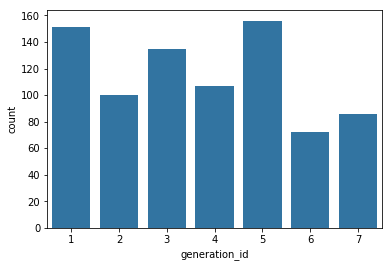

In [42]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);
# A semicolon (;) at the end of the statement will supress printing the plotting information

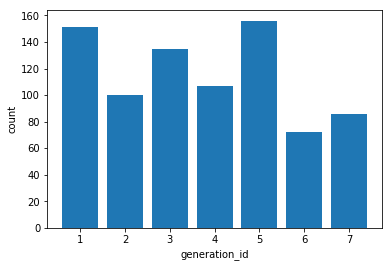

In [43]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

**Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()**

In [5]:
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

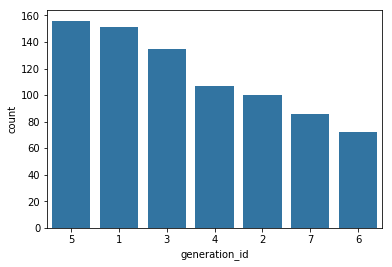

In [44]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

**Rotate the axes clockwise**

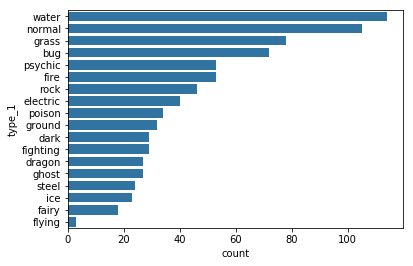

In [45]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

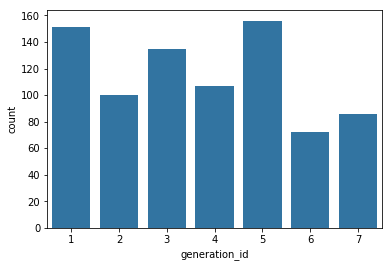

In [4]:
# YOUR CODE HERE
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [11]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [14]:
# Count the frequency of unique values in the `type_level` column of pkmn_types dataframe.
# By default, returns the decreasing order of the frequency.
types = pkmn_types['type_level'].value_counts()
print('The frequency of each type is:\n', types)

# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
type_counts = pkmn_types['type'].value_counts()
print('\nType Counts is:\n',type_counts)

# Get order of bars by frequency of 'type' values
type_order = type_counts.index
print('\nThe order of bars is:\n',type_order)

The frequency of each type is:
 type_1    807
type_2    405
Name: type_level, dtype: int64

Type Counts is:
 water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

The order of bars is:
 Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')


In [15]:
# Compute largest proportion

# Get the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
print('\nThe Number of Pokemons is:\n',n_pokemon)

# Get the highest frequency in the `type` column
max_type_count = type_counts[0]
print('\nMax Type Count is:\n',max_type_count)

# Get the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon

print('\nMax Proportion is:\n',max_prop)


The Number of Pokemons is:
 1212

Max Type Count is:
 131

Max Proportion is:
 0.10808580858085809


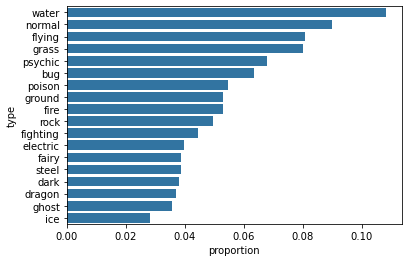

In [17]:
# Establish tick locations and create plot

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)

#  Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]



# Plot with changing the tick locations and labels
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

In [10]:
tick_props * n_pokemon

array([  0.  ,  24.24,  48.48,  72.72,  96.96, 121.2 ])

<a id='pie'></a>

### 2. Pie Charts

A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken. Use a Pie chart only when the number of categories is 2-5, and you'd like to see the proportion of each category on a chart.

**If you want to use a pie chart, try to follow certain guidelines:**

- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).

- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.

- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

*If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.*

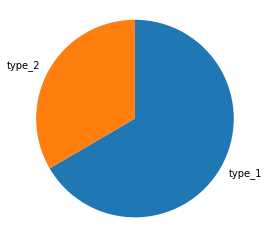

In [9]:
plt.pie(types, labels = types.index, startangle = 90, counterclock = False);

# We have used  the option `Square` so that the scaling of the plot is equal on both the x- and y-axes.
# Though, you can use either one specified here:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

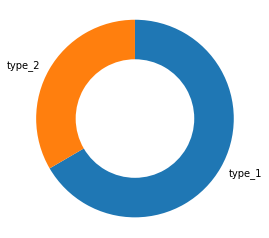

In [10]:
plt.pie(types, labels = types.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4})
plt.axis('scaled'); # Sets equal scaling (i.e., make circles circular)

<a id='hist'></a>

### 3. Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <BarContainer object of 32 artists>)

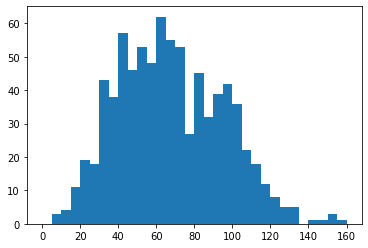

In [5]:
# Create bins with step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

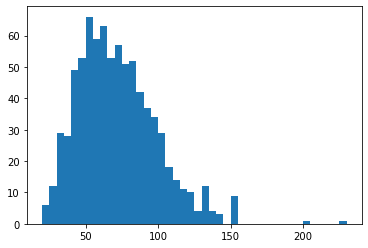

In [4]:
# YOUR CODE HERE
bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
plt.hist(pokemon['special-defense'], bins = bins);

**Plot two histograms side-by-side**

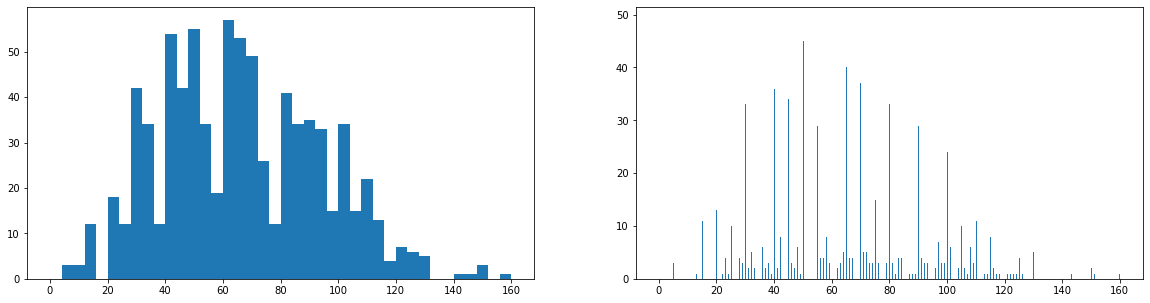

In [26]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

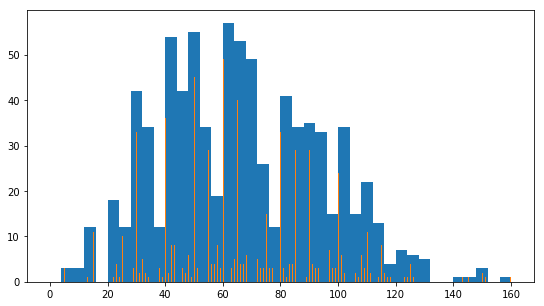

In [13]:
# two plots over each other
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

**Demonstrate figure.add_axes() and axes.hist()**

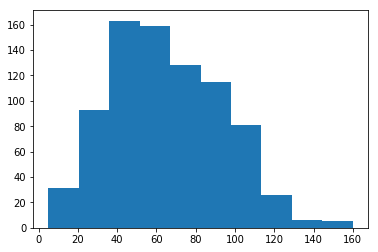

In [14]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

In [15]:
fig.get_axes()

**Plot two height histograms in a single figure of size 20 x 5 inches, side-by-side where one of them  has a changed axis limit**

(0, 6)

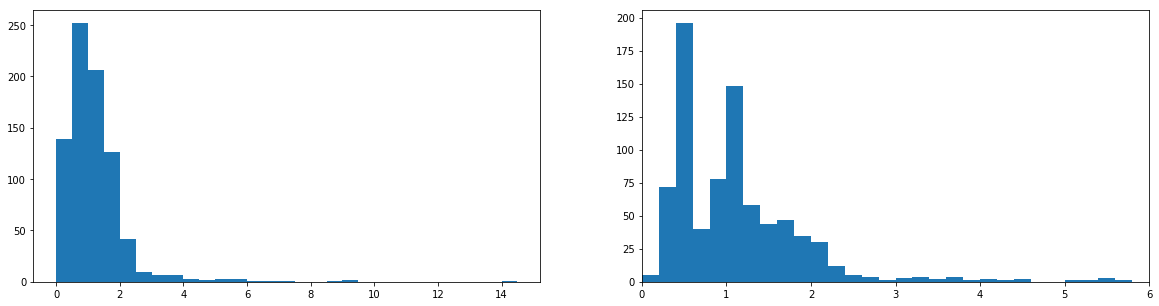

In [16]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins = bin_edges)

# histogram on right: focus in on bulk of data < 6
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins = bin_edges)
plt.xlim(0, 6) # could also be called as plt.xlim((0, 6))


<a id='bi'></a>

## D. Bivariate Exploration
In this particular section, you'll practice creating two-variable plots for data.

<a id='scatter'></a>

### 1. Scatter Plots

A scatterplot is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other. each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

To quantify how strong the correlation is between the variables, we use a correlation coefficient. **Pearson correlation coefficient (r)** captures linear relationships. It is a value ranging from -1 to +1. A positive value of r indicates the increase in one variable tends to increase another variable. On the other hand, a negative r means the increase in one variable tends to cause a decrease in another variable. A value close to 0 indicates a weak correlation, and a value close to -1 and +1 indicates a strong correlation.

**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

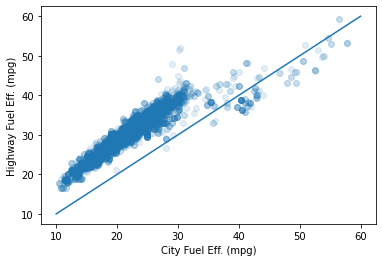

In [22]:
# YOUR CODE HERE
plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 1/8)
plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added via 'alpha' to show the concentration of data. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend. It might be good to call out this trend by adding a diagonal line to the figure using the `plot` function.

<AxesSubplot:xlabel='city', ylabel='highway'>

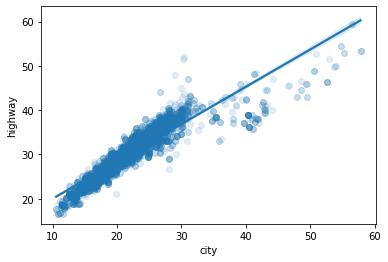

In [9]:
sb.regplot(data = fuel_econ, x = 'city', y = 'highway', scatter_kws={'alpha':1/8})

In [5]:
from scipy import stats
stats.pearsonr(fuel_econ['city'], fuel_econ['highway'])

(0.9154346462164722, 0.0)

<a id='heat'></a>

### 2. Heat Maps

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's [hist2d() function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html).

we can add a [colorbar()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html) function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

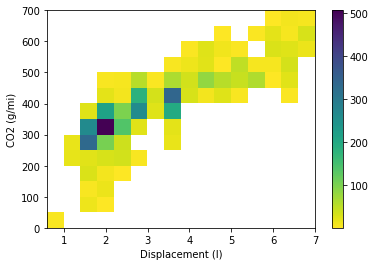

In [20]:
# YOUR CODE HERE
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4) # Engine size
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)');

In the heat map, I've set up a color map that goes from light to dark, and made it so that any cells without count don't get colored in. The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).

<a id='violin'></a>

### 3. Violin Plots

A violin plot is used for plotting the relationship between one quantitative and one qualitative variable. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted.

Seaborn's [violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function can be used to create violin plots.

In [21]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
id           3929 non-null int64
make         3929 non-null object
model        3929 non-null object
year         3929 non-null int64
VClass       3929 non-null object
drive        3929 non-null object
trans        3929 non-null object
fuelType     3929 non-null object
cylinders    3929 non-null int64
displ        3929 non-null float64
pv2          3929 non-null int64
pv4          3929 non-null int64
city         3929 non-null float64
UCity        3929 non-null float64
highway      3929 non-null float64
UHighway     3929 non-null float64
comb         3929 non-null float64
co2          3929 non-null int64
feScore      3929 non-null int64
ghgScore     3929 non-null int64
dtypes: float64(6), int64(8), object(6)
memory usage: 614.0+ KB


In [22]:
fuel_econ.VClass.value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [23]:
fuel_econ.VClass.value_counts().index

Index(['Midsize Cars', 'Compact Cars', 'Subcompact Cars', 'Large Cars',
       'Minicompact Cars'],
      dtype='object')

In [7]:
# Convert VClass values to categorical data type using pd.Categorical
fuel_econ.VClass = pd.Categorical(fuel_econ.VClass, ordered= True, categories=['Minicompact Cars', 'Large Cars','Subcompact Cars',
                                                                               'Compact Cars', 'Midsize Cars'])

In [8]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3929 non-null   int64   
 1   make       3929 non-null   object  
 2   model      3929 non-null   object  
 3   year       3929 non-null   int64   
 4   VClass     3929 non-null   category
 5   drive      3929 non-null   object  
 6   trans      3929 non-null   object  
 7   fuelType   3929 non-null   object  
 8   cylinders  3929 non-null   int64   
 9   displ      3929 non-null   float64 
 10  pv2        3929 non-null   int64   
 11  pv4        3929 non-null   int64   
 12  city       3929 non-null   float64 
 13  UCity      3929 non-null   float64 
 14  highway    3929 non-null   float64 
 15  UHighway   3929 non-null   float64 
 16  comb       3929 non-null   float64 
 17  co2        3929 non-null   int64   
 18  feScore    3929 non-null   int64   
 19  ghgScore   3929 non-null   

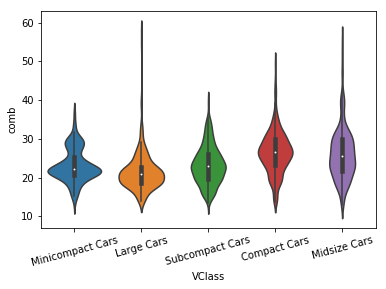

In [26]:
sb.violinplot(data=fuel_econ, x='VClass', y='comb')
plt.xticks(rotation=15);

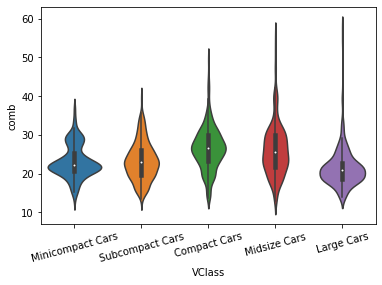

In [9]:
# Convert VClass values to categorical data type using CategoricalDtype


# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
#sedan_classes = fuel_econ.VClass.value_counts().index
# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sb.violinplot(data=fuel_econ, x='VClass', y='comb');
plt.xticks(rotation=15);

In [28]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
id           3929 non-null int64
make         3929 non-null object
model        3929 non-null object
year         3929 non-null int64
VClass       3929 non-null category
drive        3929 non-null object
trans        3929 non-null object
fuelType     3929 non-null object
cylinders    3929 non-null int64
displ        3929 non-null float64
pv2          3929 non-null int64
pv4          3929 non-null int64
city         3929 non-null float64
UCity        3929 non-null float64
highway      3929 non-null float64
UHighway     3929 non-null float64
comb         3929 non-null float64
co2          3929 non-null int64
feScore      3929 non-null int64
ghgScore     3929 non-null int64
dtypes: category(1), float64(6), int64(8), object(5)
memory usage: 587.3+ KB


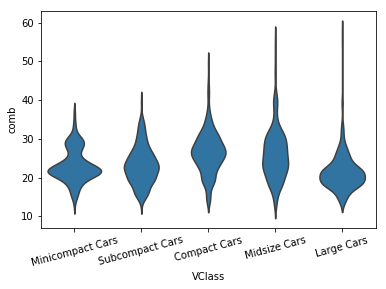

In [29]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);

**Additional Variation**

Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the *__"orient" parameter__* can be used to specify the plot orientation.

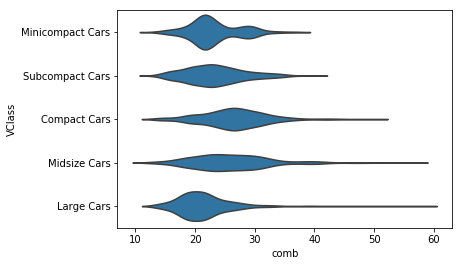

In [30]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

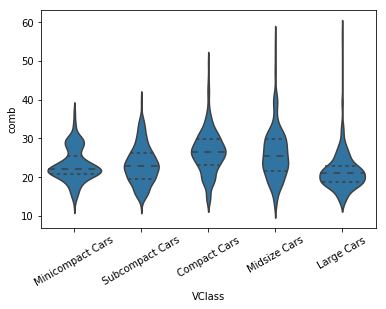

In [38]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

<a id='box'></a>

### 4. Box Plots

A box plot is another way of showing the relationship between a numeric variable and a categorical variable. In a box, the central line indicates the median, the upper and lower edges show the 1st and 3rd quartiles. Thus, the height of the box is the interquartile range (IQR). Whiskers outside of the box indicate the largest and smallest values. 25% of the data falls between each set of horizontal lines. Box plots also have outliers plotted as points further than the distance of 1.5 x IQR (Q3-Q1) above the top of the box or below the bottom of the box.

Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have ***a lot of groups*** to compare, or if you are building ***explanatory*** plots.

A box plot can be created using seaborn's [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function.

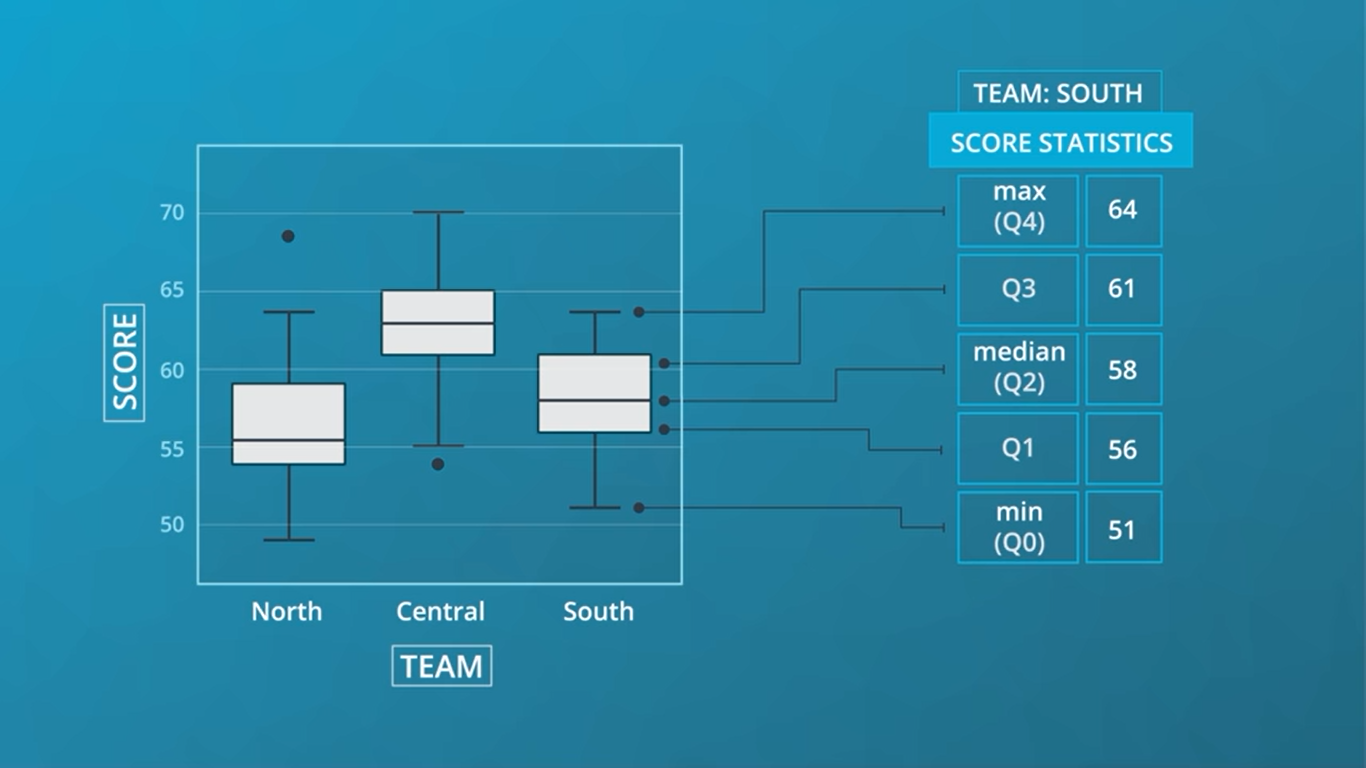

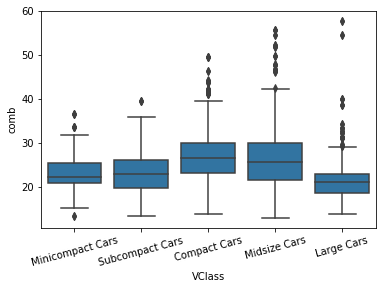

In [33]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

**Violin versus Box plot**

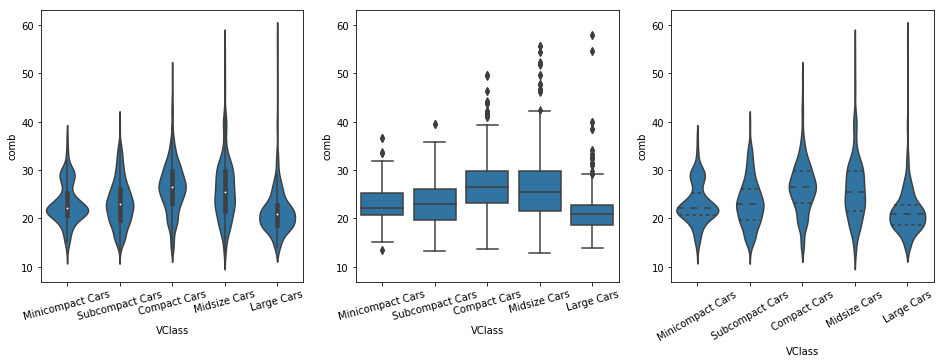

In [39]:
# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

# MIDDLE plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot.
# The Axes object returned by violinplot() is assigned to a variable, ax1, used to programmatically obtain those limit values.

# RIGHT plot: Violin with IQR
plt.subplot(1, 3, 3)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot.


**Additional Variation**

As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

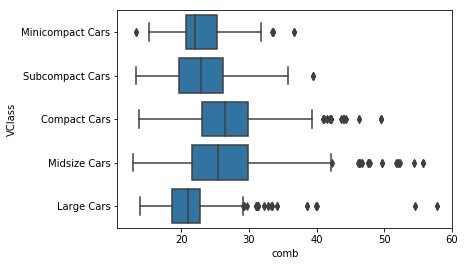

In [37]:
sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color);

**Task**: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). **Hint**: Make sure that the order of vehicle classes makes sense in your plot!

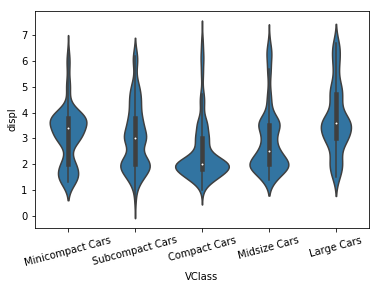

In [41]:
# YOUR CODE HERE
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 15);

<a id='clusters'></a>

### 5. Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. We can use clustered bar charts to show the relationship between two qualitative variables. However, to do this, we may need to process the second variable a little so it can be shown as a quantitative value along the y-axis. For example, you can count the frequency of the second variable. Also, you may also apply a color or texture encoding to distinguish the level of the second variable.

In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster.

The Seaborn's [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function can be used to take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

In [4]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


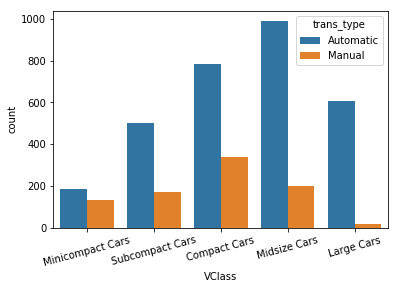

In [44]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15);

**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.

In [50]:
fuel_econ['fuelType'].value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

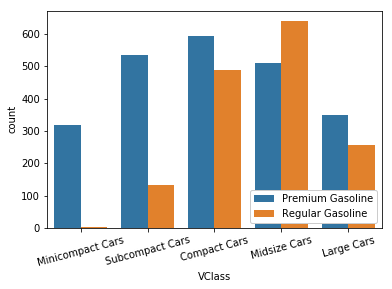

In [49]:
# YOUR CODE HERE
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15);

<a id='faceting'></a>

### 6. Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets (subsets with no common elements), most often by different levels (values) of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

Faceting is most useful in multivariate visualization.

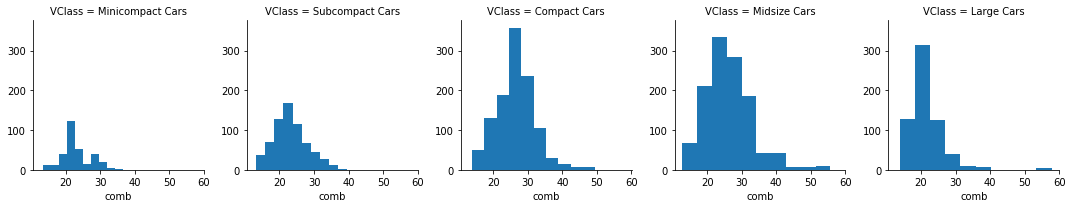

In [51]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

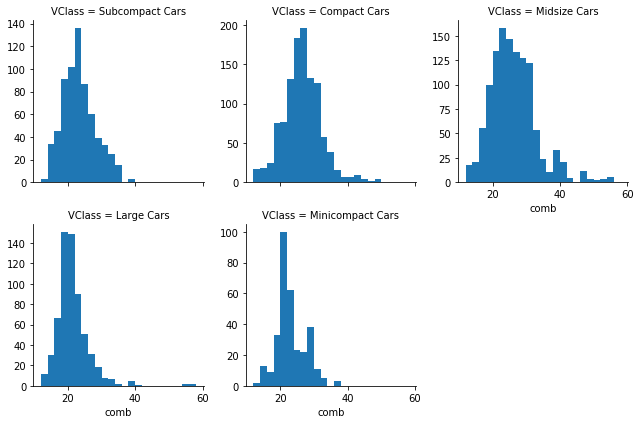

In [3]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

**Additional Variation**
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting `col_wrap = 7` means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

In [5]:
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_means

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [6]:
# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False)
group_order

,comb
trans,
Automatic (variable gear ratios),37.523607
Automatic (A1),34.677929
Automatic (AM6),33.194893
Automatic (AV-S6),31.246947
Automatic (AV-S7),30.242895
Manual 5-spd,29.584096
Automatic 4-spd,29.283284
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867


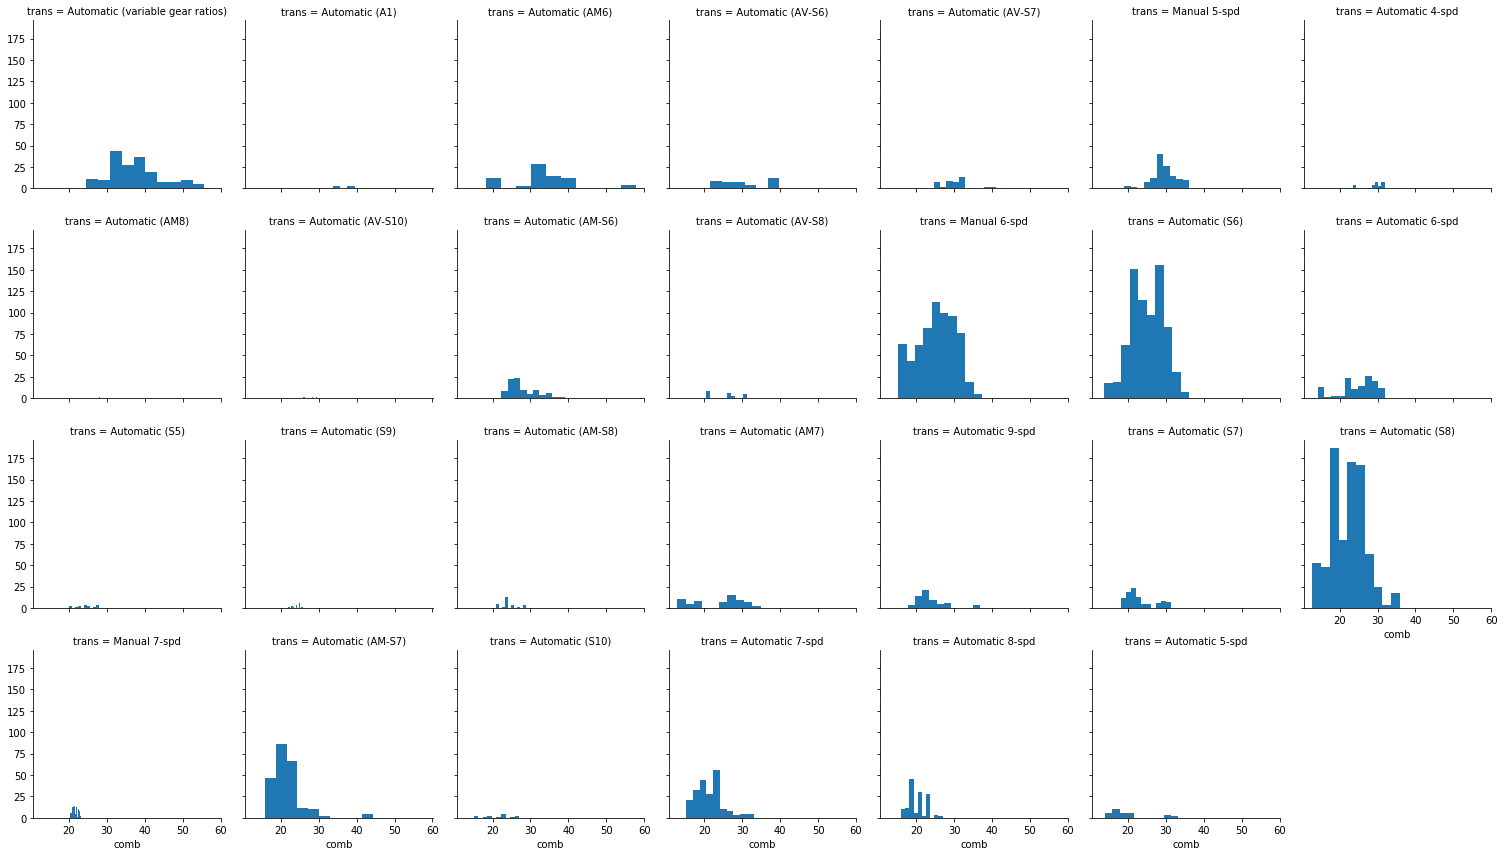

In [8]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb');

<a id='adapt'></a>

### 7. Adaptation of Univariate Plots

Histograms and bar charts were introduced previously as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) function:

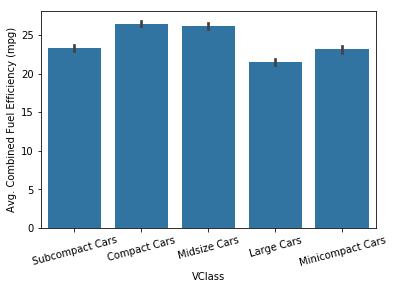

In [4]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

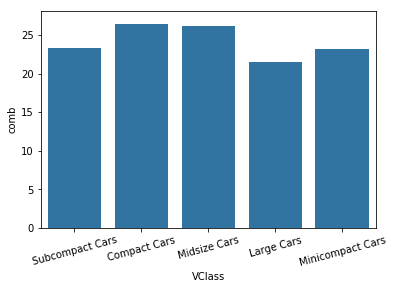

In [7]:
# Remove Error Bars
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=15);

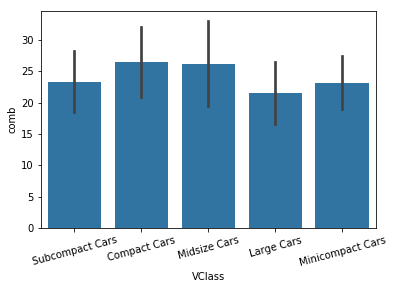

In [8]:
# Use Standard Deviation instead of average
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);

As an alternative, the [pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html) function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing

Text(0,0.5,'Avg. Combined Fuel Efficiency (mpg)')

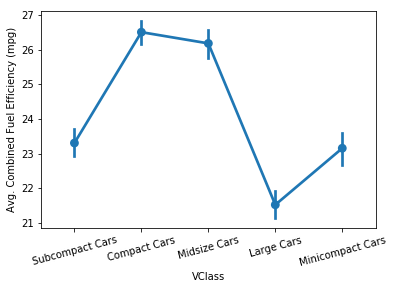

In [11]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

By default, pointplotwill connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via `linestyles = ""` for nominal data.

Text(0,0.5,'Avg. Combined Fuel Efficiency (mpg)')

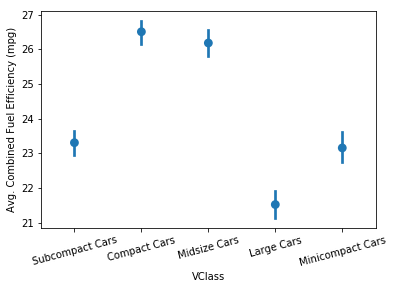

In [12]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types.

For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

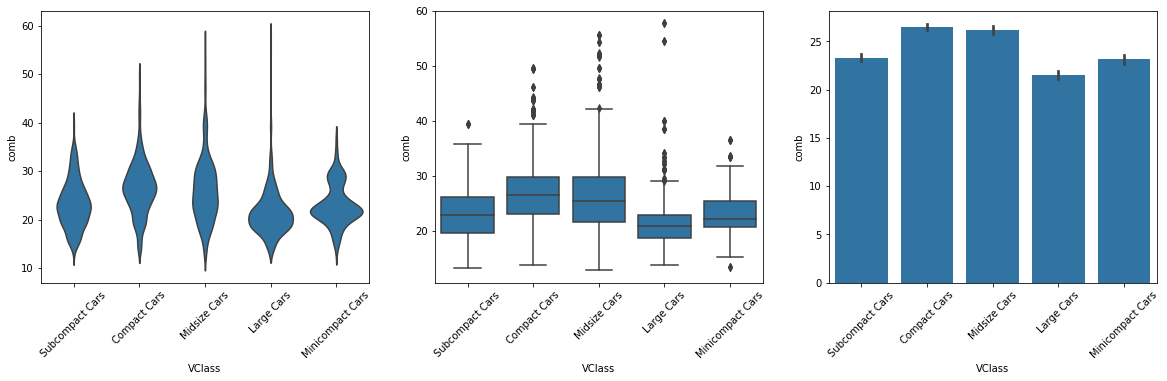

In [13]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [14]:
# Find frequency(count) of each car make
make_frequency = fuel_econ['make'].value_counts()
make_frequency

BMW                  523
Mercedes-Benz        269
Porsche              235
Ford                 218
Chevrolet            212
Audi                 201
MINI                 201
Volkswagen           174
Hyundai              158
Dodge                140
Lexus                125
Kia                  124
Cadillac             118
Toyota               116
Infiniti             108
Honda                101
Jaguar                98
Mazda                 87
Nissan                71
Buick                 66
Subaru                60
Chrysler              58
Lincoln               52
Volvo                 50
Acura                 46
Bentley               45
Mitsubishi            44
Rolls-Royce           42
Maserati              39
Scion                 27
Fiat                  26
Ferrari               23
Genesis               17
Aston Martin          15
Suzuki                13
Lotus                 10
Roush Performance     10
Alfa Romeo             6
Karma                  1
Name: make, dtype: int64

In [15]:
# Find number of car makes with frequency more than 80
THRESHOLD = 80
idx = np.sum(make_frequency > THRESHOLD)
idx

18

In [18]:
# Get values of most frequent makes
most_makes = make_frequency.index[:idx]
most_makes

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'Audi', 'MINI',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object')

In [19]:
# Create a sub dataframe for makes of interest
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]
fuel_econ_sub

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4
10,32217,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.8,89,0,18.1909,22.8000,26.7761,37.9000,21.2581,420,5,5


In [22]:
# Find mean values for each car make
make_means = fuel_econ_sub.groupby('make').mean()
make_means

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
make,,,,,,,,,,,,,,
Audi,35835.398010,2015.532338,5.512438,2.751741,25.781095,48.786070,20.426925,25.652045,29.389482,40.513205,23.639240,384.676617,5.432836,5.402985
BMW,35953.648184,2015.493308,5.973231,3.083748,35.441683,55.269598,19.862614,25.157074,28.649093,40.927519,23.004798,394.885277,5.221797,5.214149
Cadillac,36052.110169,2015.584746,5.474576,3.243220,24.398305,93.983051,18.845043,24.039474,26.939762,38.256114,21.773203,408.686441,4.915254,4.932203
Chevrolet,35903.301887,2015.476415,4.886792,2.599528,19.740566,67.037736,23.955976,31.080558,33.017294,47.937314,27.224809,343.957547,6.386792,6.353774
Dodge,35907.100000,2015.278571,6.285714,4.225714,32.228571,41.035714,18.516134,23.345414,27.948863,39.730484,21.812190,424.164286,4.878571,4.878571
Ford,36168.706422,2015.559633,4.770642,2.560092,19.977064,67.908257,24.015862,31.406761,31.864245,46.266219,26.796018,345.027523,6.261468,6.261468
Honda,36679.217822,2015.762376,4.297030,2.095050,48.108911,79.445545,28.459160,37.321850,36.852788,53.739881,31.588841,285.683168,7.396040,7.435644
Hyundai,35803.639241,2015.417722,4.481013,2.273418,9.765823,76.848101,25.746294,33.590951,33.917482,48.984818,28.793620,323.500000,6.759494,6.759494
Infiniti,36434.888889,2015.703704,5.962963,3.511111,20.861111,72.657407,20.366878,25.880562,27.471818,39.345459,23.002081,396.157407,5.175926,5.175926


In [24]:
# Sort by highest combined fuel efficiency 
make_means.sort_values('comb', ascending = False)

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
make,,,,,,,,,,,,,,
Toyota,36624.948276,2015.844828,4.258621,2.128448,2.655172,69.000000,33.521868,45.392911,37.982182,55.308152,35.184424,263.120690,7.948276,7.948276
Honda,36679.217822,2015.762376,4.297030,2.095050,48.108911,79.445545,28.459160,37.321850,36.852788,53.739881,31.588841,285.683168,7.396040,7.435644
Mazda,36022.126437,2015.563218,4.022989,2.212644,0.000000,51.517241,26.995895,35.310628,35.880013,52.533972,30.397474,295.229885,7.298851,7.298851
Hyundai,35803.639241,2015.417722,4.481013,2.273418,9.765823,76.848101,25.746294,33.590951,33.917482,48.984818,28.793620,323.500000,6.759494,6.759494
Kia,36075.435484,2015.612903,4.306452,2.168548,14.032258,71.241935,24.759523,32.193702,33.010664,47.700759,27.843018,326.266129,6.612903,6.612903
MINI,36063.034826,2015.537313,3.786070,1.694030,14.706468,5.353234,24.922366,32.219974,32.449508,46.911494,27.807288,320.124378,6.721393,6.726368
Volkswagen,35416.551724,2015.034483,4.224138,2.076437,21.045977,35.540230,24.474875,31.103506,33.390893,47.435924,27.769875,331.626437,6.683908,6.528736
Chevrolet,35903.301887,2015.476415,4.886792,2.599528,19.740566,67.037736,23.955976,31.080558,33.017294,47.937314,27.224809,343.957547,6.386792,6.353774
Ford,36168.706422,2015.559633,4.770642,2.560092,19.977064,67.908257,24.015862,31.406761,31.864245,46.266219,26.796018,345.027523,6.261468,6.261468


In [23]:
# Get sorted car makes
comb_order = make_means.sort_values('comb', ascending = False).index
comb_order

Index(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'],
      dtype='object', name='make')

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six-column by three-row grid.

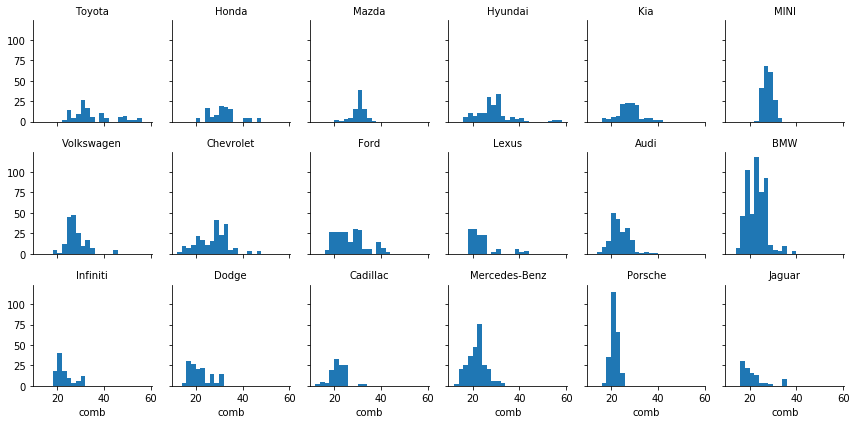

In [30]:
 # plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 2,col_order = comb_order)
# Plot histograms
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}'); # Uses Values of "make" column as titles

**Task 2**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

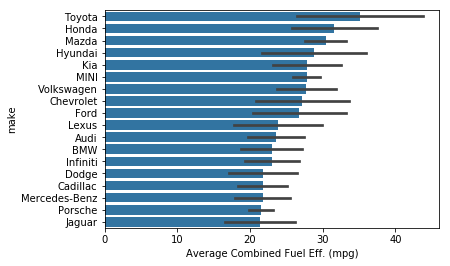

In [32]:
# YOUR CODE HERE
# plotting
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make', color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.

<a id='line'></a>

### 8. Line Plots

The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against the values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

**Why Lines over Bars?
- Emphasize relative change
- Emphasize trends accross x-axis

Therefore, line plots are inapropriate to use if values on X-axis are nominal.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We can make use of Seaborn's [lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html) function to create line charts. The default aggregation is mean values.

<AxesSubplot:xlabel='displ', ylabel='comb'>

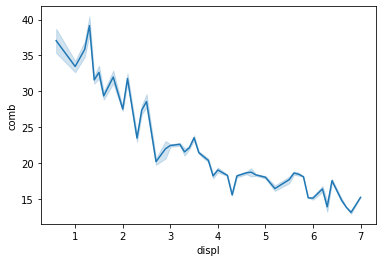

In [24]:
sb.lineplot(data=fuel_econ, x='displ', y='comb')

We can also use of Matplotlib's [errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function, to summarize a quantitative variable against a second quantitative variable in order to get the data into its necessary form. It plots a line between points with an optional setting for adding error bars.

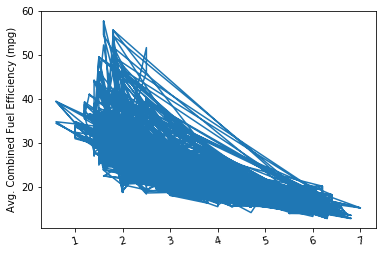

In [33]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

Documentation: Refer to the [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function syntax.

In [16]:
fuel_econ['displ'].min()

0.6

In [17]:
fuel_econ['displ'].max()

7.0

In [14]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
print('Bin edges: ', bin_edges)
bin_centers = bin_edges[:-1] + 0.1
print('\nBin centers: ',bin_centers)
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

Bin edges:  [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.
 4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7. ]

Bin centers:  [0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1
 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3 6.5 6.7 6.9]


0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

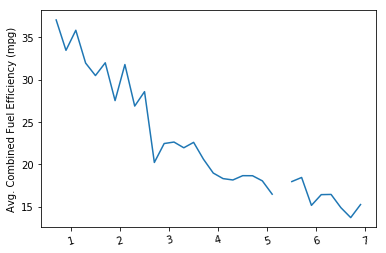

In [39]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

<a id='multi'></a>

## D. Multivariate Exploration
In this particular notebook, you'll practice creating multi-variable plots for data.

<a id='np'></a>

### 1. Non Positional Encoding

Three main non-positional encodings stand out:

- shape (Categorical)
- size (Numerical)
- color (Categorical or Numerical)

**Encoding via Shape**

Shape is a good encoding for _**categorical variables**_, using one shape for each level of the categorical variable. Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the `scatter` or `regplot` function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

The `legend` function adds a legend to the plot, with one marker for every scatter call made. The function argument sets the labels for those points.

_Documentation: [matplotlib built-in markers](https://matplotlib.org/stable/api/markers_api.html), [marker reference example](https://matplotlib.org/2.0.2/examples/lines_bars_and_markers/marker_reference.html)_

In [9]:
# Create Subset of Fuel-econ data to reduce overplotting

np.random.seed(2018) # Select the same values every time for sake of reproducibility

#From all rows in fuel_econ, create an array of 200 values with using any multiple times
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
print('Sample:\n', sample)

fuel_econ_subset = fuel_econ.loc[sample]
fuel_econ_subset.head()

Sample:
 [ 872 1663 2428 1180  853 2052 2184  145 2789 1936  885 1241 2744 1172
 1925 3871 1775 1591 3021  353 1292 1245 1828    3  351  272 3790  285
 2097 3363 3803 2537 1283  926 2595 2485  206 1894 2437 2790 2019 1491
  810 1552 3356 1406 2255  181 3481 3453 1650 2445 2911  339 2060 2556
 2100  820 2438 3526 1916 2043   89 1339 1088 2665 3805 3359 3839 2945
 3376 3024 3617  197 2153 2594 2584 1058 2170 2772  384 2247 2887 1691
 1867  527 3683 3096 3891 3890  365 1868 3777 2694 1077 1154 2417 2260
  821  594 3482 1528  694 1521 3117  190  567  236 1878 1698 2209 1000
  785 2115 2223 3418  282 3917 2832  860 2346  284 3425 3441 3445 3769
 1398  143 2924 3836 1086 3109  695 2993 1376 1645 1604 3470 2749 2109
 2490  654 2119 3365 2249   91 3057  307 1780 2568 2622  759 2860 1043
 2017 3320 3058  112  640 2648  310 3639 2652 1930  838 1026 2407 3008
 3590 1196  258 3211   62 3347 2701 2474 2948 3643 1998 3471  391 3530
   94 2147 1328 2868 1804 1289  390 2670 1294  133 1358 1290 2644 29

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic
1180,34466,Porsche,911 Targa 4,2014,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.4,...,0,18.3385,23.0000,25.8687,36.5000,21.1028,422,5,5,Manual
853,33852,Cadillac,XTS AWD,2014,Large Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,104,15.9536,19.8000,23.7068,33.2000,18.7067,475,4,4,Automatic


In [10]:
fuel_econ.shape

(3929, 21)

In [11]:
fuel_econ_subset.shape

(200, 21)

Cars of high fuel efficiency are all of Automatic type


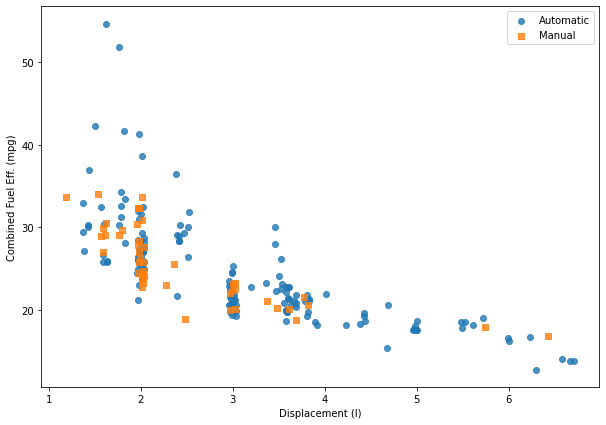

In [51]:
ttype_markers = [['Automatic', 'o'],
               ['Manual', 's']]

plt.figure(figsize = [10, 7])

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False, marker = marker)

plt.xlabel('Displacement (l)') # Enggine Size
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic','Manual'])
print('Cars of high fuel efficiency are all of Automatic type');

Cars of high fuel efficiency are all of Automatic type


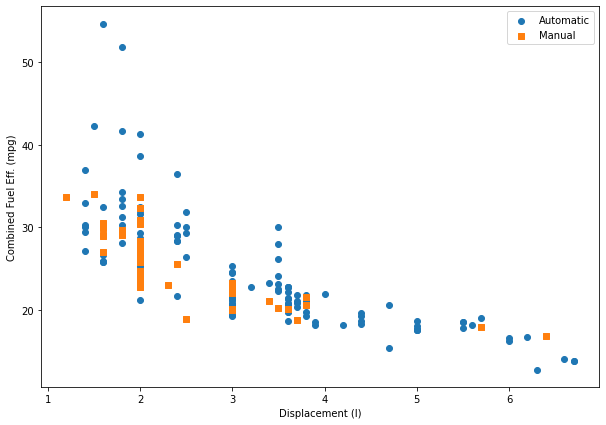

In [50]:
# Same results can be applied by plotting typing each the code for each plot separately and passing the required values
plt.figure(figsize = [10, 7])

plt.scatter(data = fuel_econ_subset[fuel_econ_subset['trans_type'] == 'Automatic'], x = 'displ', y = 'comb', marker = 'o')
plt.scatter(data = fuel_econ_subset[fuel_econ_subset['trans_type'] == 'Manual'], x = 'displ', y = 'comb',  marker = 's')

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic','Manual'])
print('Cars of high fuel efficiency are all of Automatic type');

**Encoding via size**

Point size is a good encoding for _**numerical variables**_.Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in `scatter`. (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with `regplot`.)

While the creation of the plot is easier with size, we need to put in extra leg work to create a legend. Since, as noted above, `legend` will only create one legend entry per plot function call, we need to create additional dummy `scatter` objects with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function:

- The list of plotting objects to depict in the legend
- Their labels

You might need to apply a scaling factor (e.g., multiplying or dividing all values by 2) or shift in order to make the size encoding interpretable. In particular, if the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.

As engine size increases, there is a higher level of CO2 emission.
Less fuel-efficient cars have higher emissions.


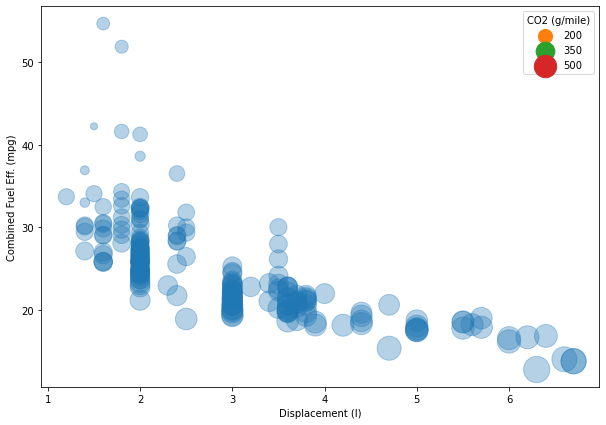

In [12]:
# Same results can be applied by plotting typing each the code for each plot separately and passing the required values
plt.figure(figsize = [10, 7])

plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', s = 'co2', alpha = 1/3)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Create a legend
sizes = [200, 350, 500] # List of circle sizes
legend_obj = [] # list to store legend objects

for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mile)')

print('As engine size increases, there is a higher level of CO2 emission.\nLess fuel-efficient cars have higher emissions.');

As engine size increases, there is a higher level of CO2 emission.
Less fuel-efficient cars have higher emissions.


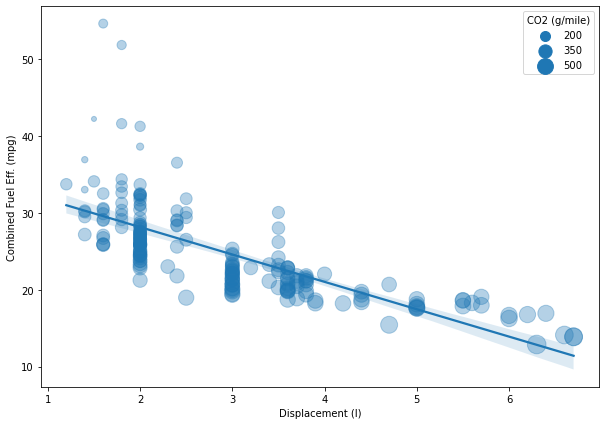

In [78]:
# Same results can be applied by plotting typing each the code for each plot separately and passing the required values
plt.figure(figsize = [10, 7])

sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', scatter_kws = {'s': fuel_econ_subset.co2/2, 'alpha': 1/3})

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Create a legend
sizes = [200, 350, 500] # List of circle sizes
legend_obj = [] # list to store legend objects
base_color = sb.color_palette()[0] # Sets color of all sizes to blue

for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/2, color = base_color)) 
    
plt.legend(legend_obj, sizes, title = 'CO2 (g/mile)')
print('As engine size increases, there is a higher level of CO2 emission.\nLess fuel-efficient cars have higher emissions.');

<a id='color'></a>

### 2. Color Palettes

Color is a very common encoding for variables, for both qualitative and quantitative variables. You've already seen this employed in previous lessons where position could not be used to encode a value:

Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.

If you have a _**qualitative**_ variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's `FacetGrid` class.

For _**quantitative**_ variables, we should not take the same approach, since `FacetGrid` expects any variable input for subsetting to be categorical. Instead, we can set color based on numeric value in the `scatter` function through the "c" parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through regplot due to how its "color" argument is set up.)

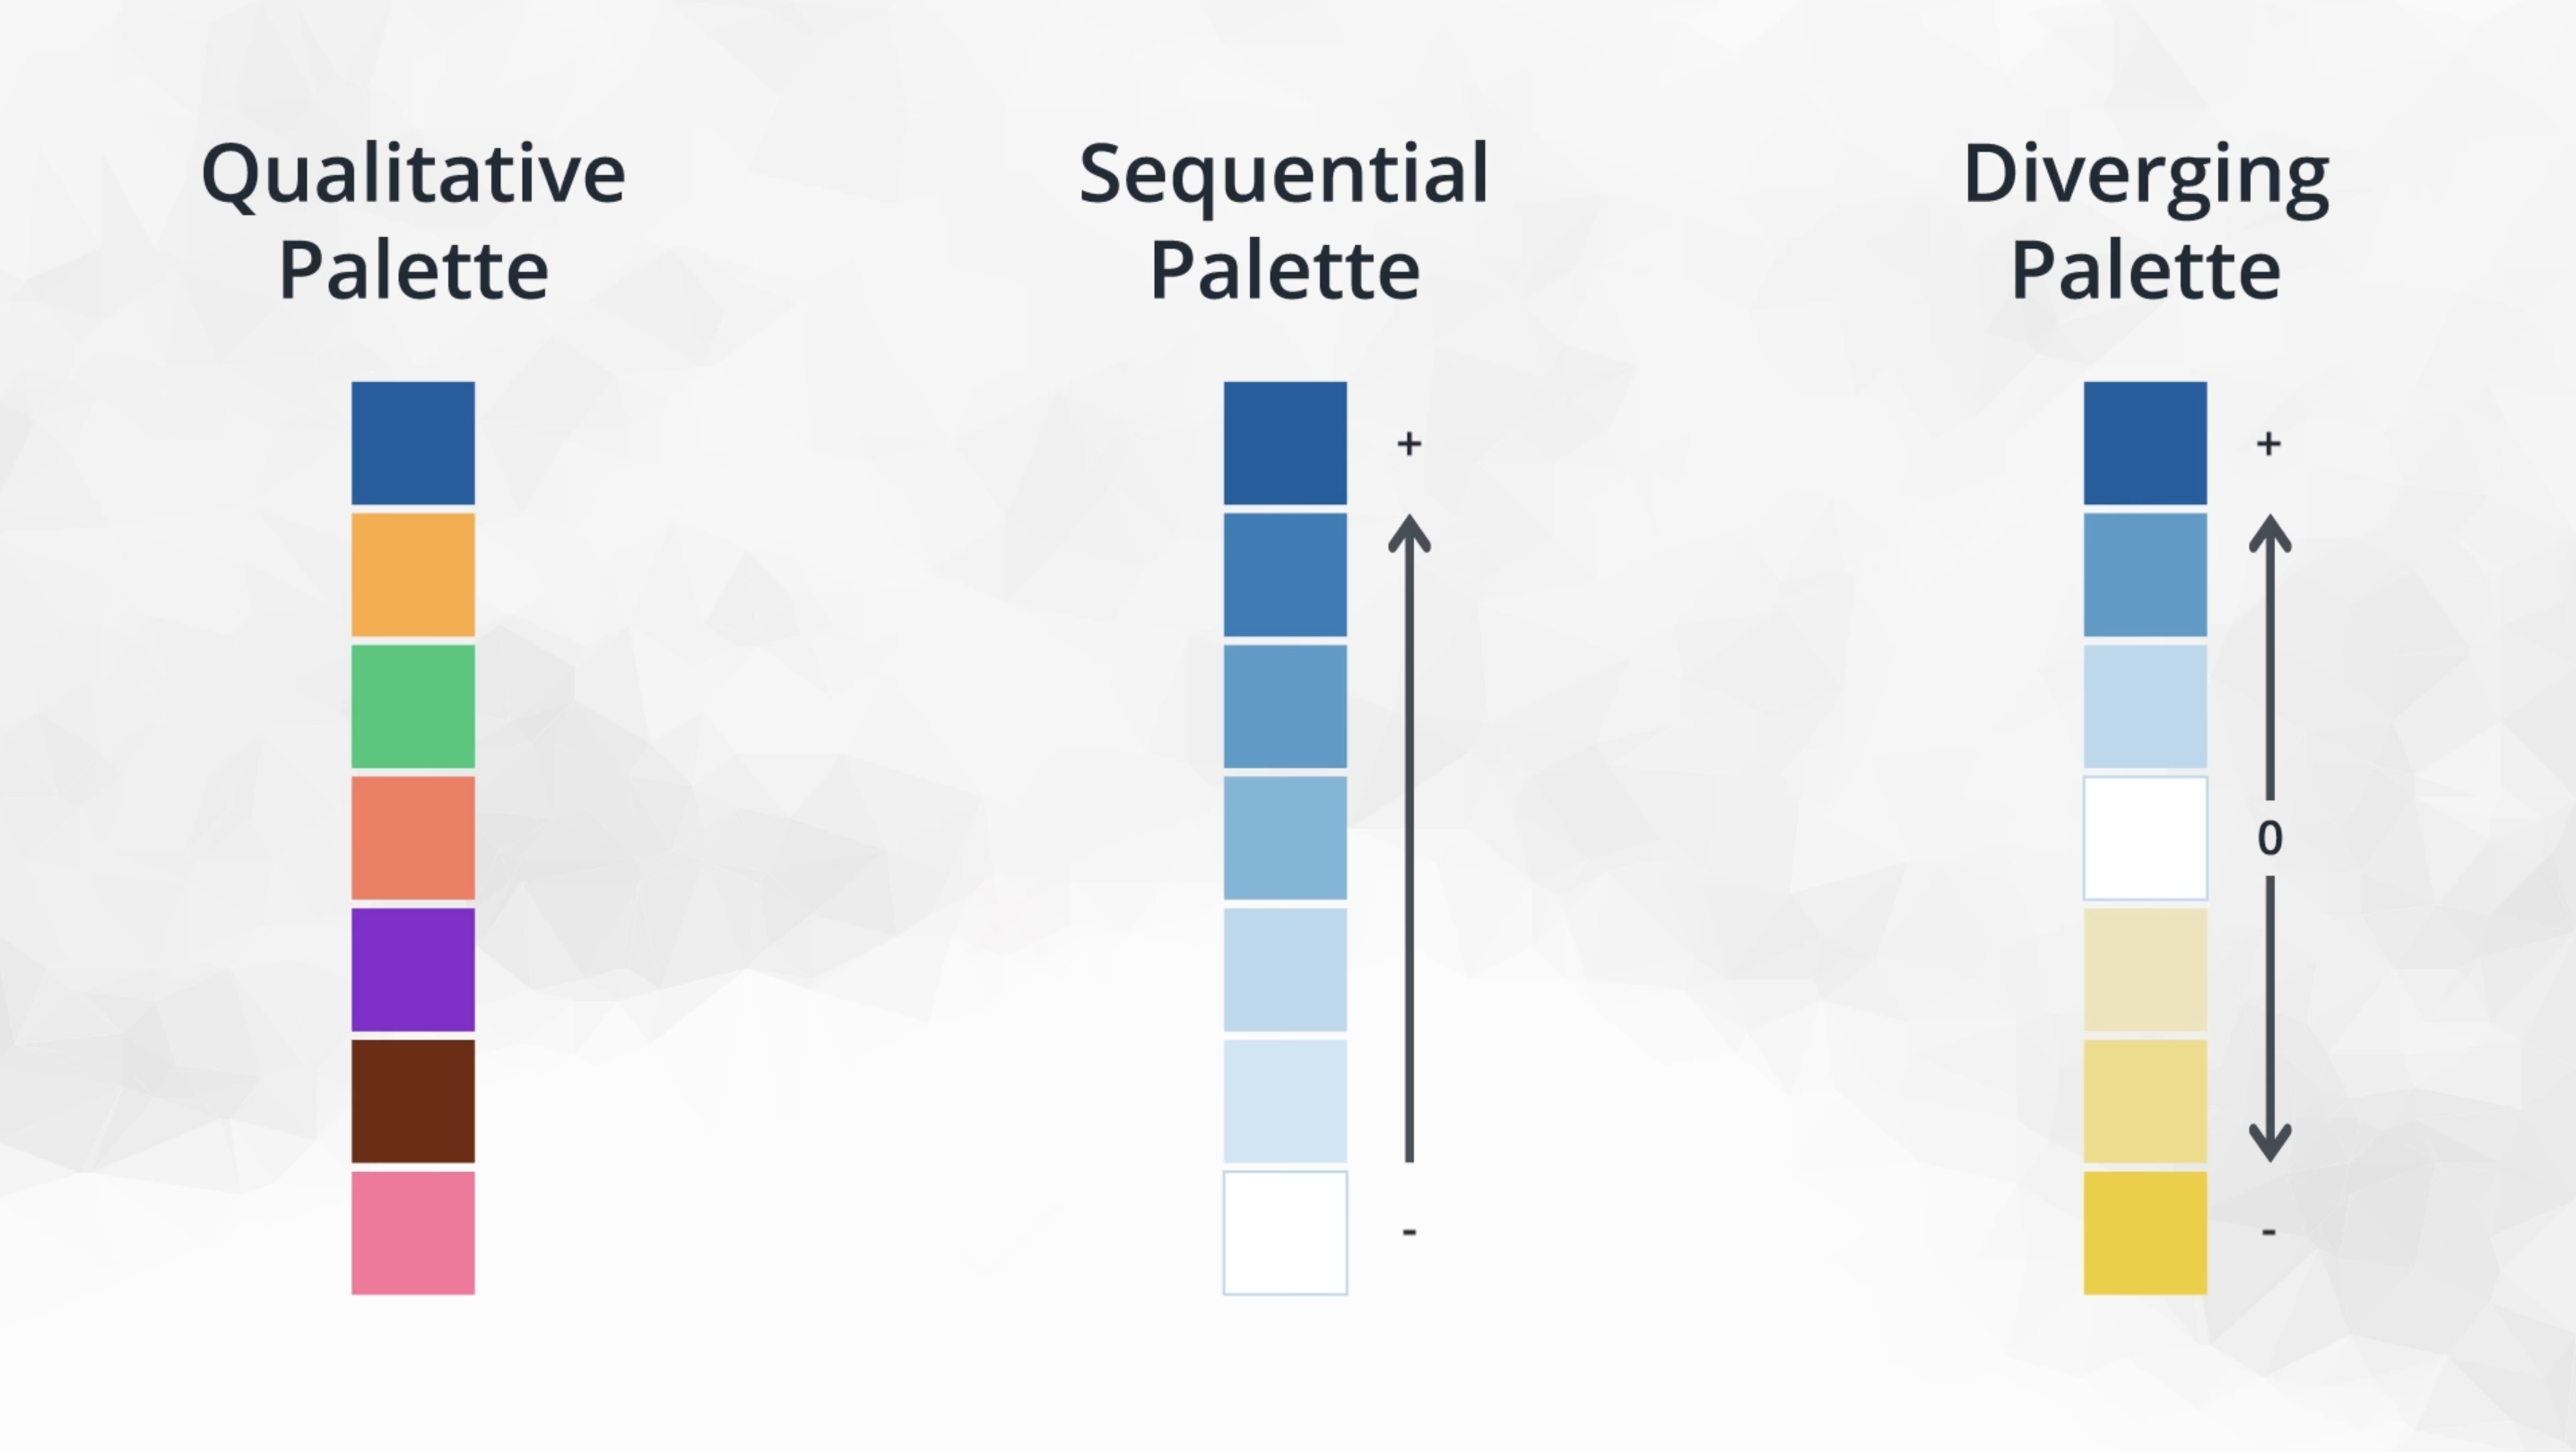

**Nominal Variable**

Cars of high fuel efficiency are all of Automatic type


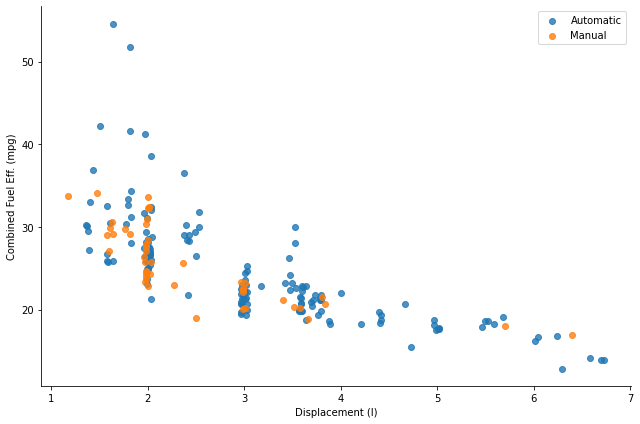

In [34]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type',
                 hue_order = ['Automatic', 'Manual'], height = 6, aspect = 1.5) # size parameter changed to height in recent versions
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

   
plt.legend()
print('Cars of high fuel efficiency are all of Automatic type');

**Oredered Variable**

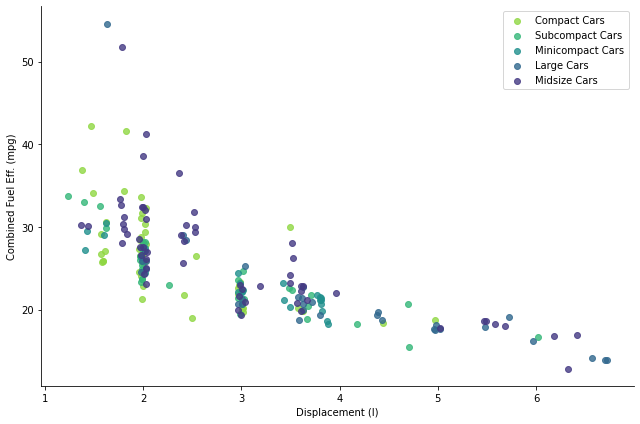

In [44]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass', palette = 'viridis_r',
                 height = 6, aspect = 1.5) # size parameter changed to height in recent versions
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

   
plt.legend();

**Numeric Variables**

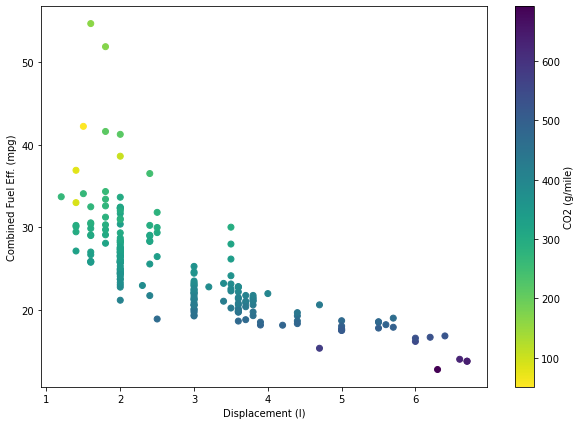

In [52]:
plt.figure(figsize = [10,7])

plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2', cmap = 'viridis_r')

plt.colorbar(label = 'CO2 (g/mile)')

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


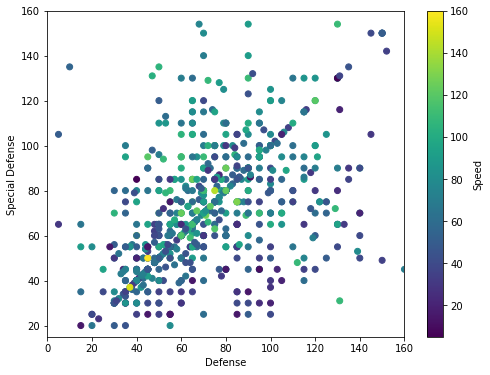

In [63]:
# YOUR CODE HERE
plt.figure(figsize = [8,6])
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', c = 'speed')
plt.colorbar(label = 'Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense');

print('When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.')

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [65]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [67]:
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
pokemon_sub

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,130,257,115,7,1.9,70,787,85,95,tapu-bulu,75,45.5,type_2,fairy
1594,75,257,115,7,1.3,70,788,95,130,tapu-fini,85,21.2,type_2,fairy
1605,101,257,53,7,5.5,223,799,97,53,guzzlord,43,888.0,type_2,dragon
1607,95,270,115,7,1.0,80,801,130,115,magearna,65,80.5,type_2,fairy


C:\Users\Mic\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


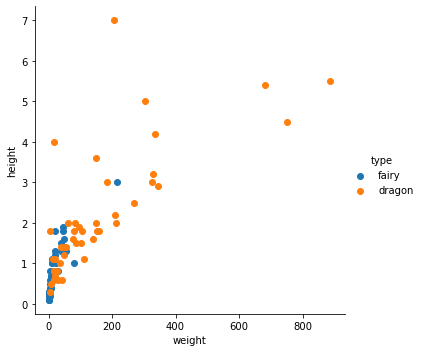

In [108]:
# YOUR CODE HERE
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')

#g.set(xscale = 'log') # need to set scaling before customizing ticks
#x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
#g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

After subsetting the data, I used FacetGrid to set up and generate the plot. I used the .set() method for FacetGrid objects to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.


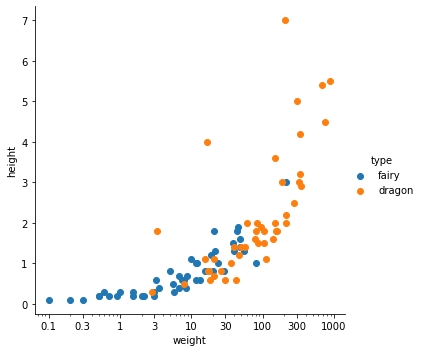

In [109]:
# YOUR CODE HERE
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', height = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

print('After subsetting the data, I used FacetGrid to set up and generate the plot. I used the .set() method for FacetGrid objects to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.')

<a id='mfaceting'></a>

### 3. Faceting

Faceting bivariate plots to create a multivariate visualizations.

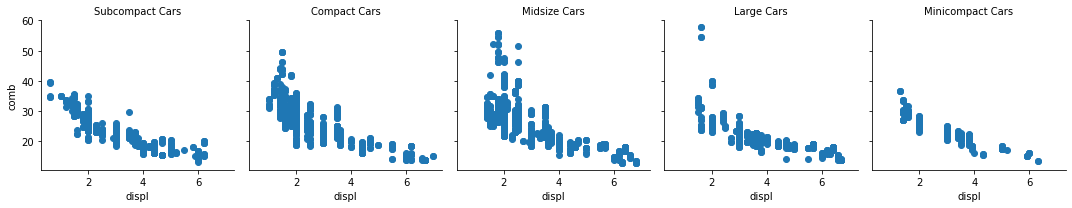

In [81]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.scatter, 'displ', 'comb')
g.set_titles('{col_name}'); # Uses Values of "VClass" column as titles

FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

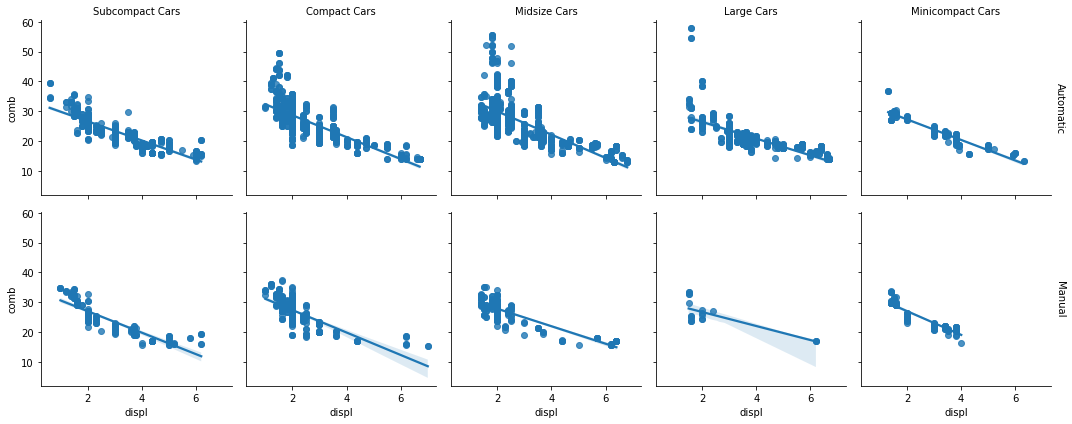

In [91]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row ='trans_type', margin_titles = True) # Moves row labels to the right side
g.map(sb.regplot, 'displ', 'comb') #, fit_reg = False)
g.set_titles(row_template='{row_name}', col_template='{col_name}');
# Uses Values of "VClass" column as col titles, and Values of "trans_type" column as row titles

<a id='adaptBi'></a>

### 4. Other Adaptations of Bivariate Plots

in the previous lesson, you also saw one other way of expanding univariate plots into bivariate plots : substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable.

This adaptation can also be done for bivariate plots like the _**heat map, clustered bar chart, and line plot**_, to allow them to depict multivariate relationships.

**Adapted Clustered Bar Chart**

An alternative approach for _**two categorical variables and one numeric variable**_ is to adapt a clustered bar chart using the `barplot` function instead of the `countplot` function:

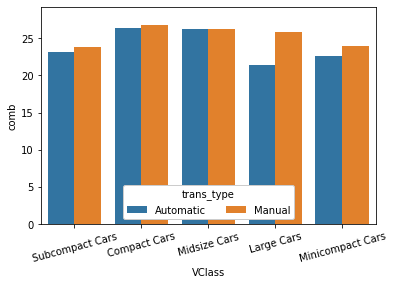

In [193]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', hue= 'trans_type', errwidth=0)
plt.xticks(rotation=15)
plt.ylabel = 'Average Combined Efficiency (mpg)'
plt.legend(loc = 8, ncol = 2, framealpha = 1, title = 'trans_type');

**Adapted Line Chart**

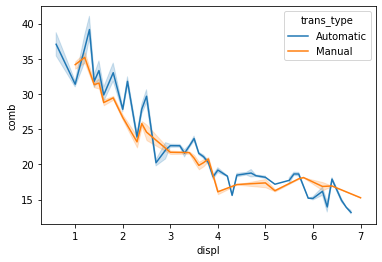

In [212]:
sb.lineplot(data=fuel_econ, x='displ', y='comb', hue= 'trans_type');

**Clustered Box Plot**

The "hue" parameter can also be used in a similar fashion in the boxplot, violinplot, and pointplot functions to add a categorical third variable to those plots in a clustered fashion.

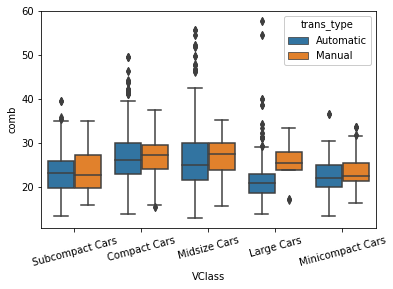

In [199]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue= 'trans_type')
plt.xticks(rotation=15)
plt.ylabel = 'Average Combined Efficiency (mpg)'
plt.legend(loc = 1, ncol = 1, framealpha = 1, title = 'trans_type');

**Adapted Heat Map**

The adapted heat map is a bit excessive in terms of work. If we want to depict the mean of a third variable in a **2-d histogram**, we need to change the weights of points in the `hist2d` function. This requires we figure out in which bin each point falls, count the number of points in each bin, and get the average points in each bin by dividing the values of the third variable over the number of points.

**A scatterplot with color or size encoding could be sufficient for depicting the data.**


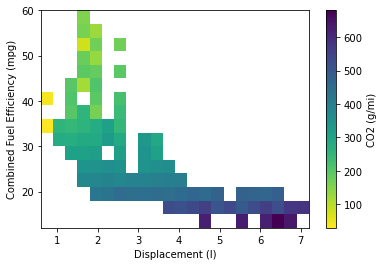

In [169]:
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.3, 0.3) # Engine size
bins_y = np.arange(12, fuel_econ['comb'].max()+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', bins = [bins_x, bins_y], weights = co2_weights,
           cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

In [140]:
bins_x

array([0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6, 3.9, 4.2,
       4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2])

In [147]:
# Figure out in which bin each point falls
displ_bins = pd.cut(fuel_econ.displ, bins_x, right = False,
                    include_lowest = False, labels = False).astype(int) # labels=False returns only integer position of the bins instead of bin ranges
print(displ_bins.min())
print(displ_bins.max())
print(len(displ_bins))
displ_bins

0
21
3929


0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int32

In [166]:
# Figure out in which bin each point falls
comb_bins = pd.cut(fuel_econ.comb, bins_y, right = False,
                    include_lowest = False, labels = False).astype(int) # labels=False returns only integer position of the bins instead of bin ranges
print(comb_bins.min())
print(comb_bins.max())
print(len(comb_bins))
comb_bins

0
15
3929


0        2
1        4
2        2
3        2
4        5
        ..
3924    14
3925     9
3926    10
3927     3
3928     3
Name: comb, Length: 3929, dtype: int32

In [162]:
# Count the number of points in each bin using groupby() and size() functions
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
# This produces a multi-index series that is hard to work with
n_points

displ  comb
0      7        3
       9        3
1      6        4
       7        8
2      5       42
               ..
19     1       20
       2       15
20     0       38
       1       13
21     1        2
Length: 91, dtype: int64

In [163]:
# Use reset_index() and pivot() to put the counts in array form and use "values" attribute to get the number of points as an array
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

In [164]:
n_points.shape

(22, 16)

In [165]:
22*16

352

In [167]:
# Get average CO2 emission in each bin by dividing CO2 values over number of points in each bin
co2_weights = fuel_econ['co2']/n_points[displ_bins,comb_bins]
co2_weights

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

C:\Users\Mic\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


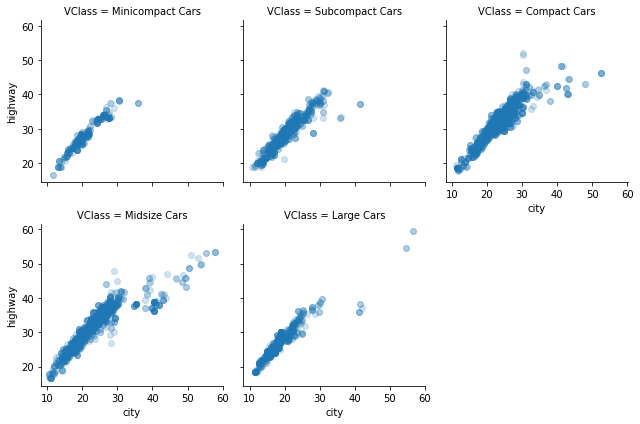

In [215]:
# YOUR CODE HERE

# Ordering the categories
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")

if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # compatibility for v.20
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)

# plotting
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', size = 3, col_wrap = 3)
g.map(plt.scatter, 'city', 'highway', alpha = 1/5);

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.

**Task 2**: Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

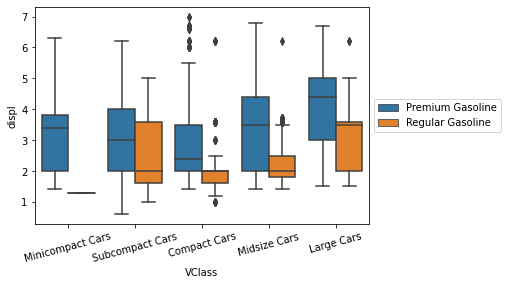

In [221]:
# YOUR CODE HERE
# data setup
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
# plotting
sb.boxplot(data = fuel_econ_sub, x = 'VClass', y = 'displ', hue = 'fuelType')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15);

I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.

<a id='matrices'></a>

### 5. Plot Matrices


To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

Seaborn's [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) class facilitates the creation of this kind of plot matrix.

By default, PairGrid only expects to depict numeric variables; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes. On the diagonals, where the row and column variables match, a **_histogram_** is plotted. Off the diagonals, a **_scatterplot_** between the two variables is created.

Be aware that the time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. In addition, increasing the number of variables means that the individual subplot size needs to be reduced in order to fit the matrix width on your screen. That means that, if you have a lot of data, it might be difficult to see the relationships between variables due to overplotting, and it will take a long time to complete. One recommended approach is to take a random subset of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.

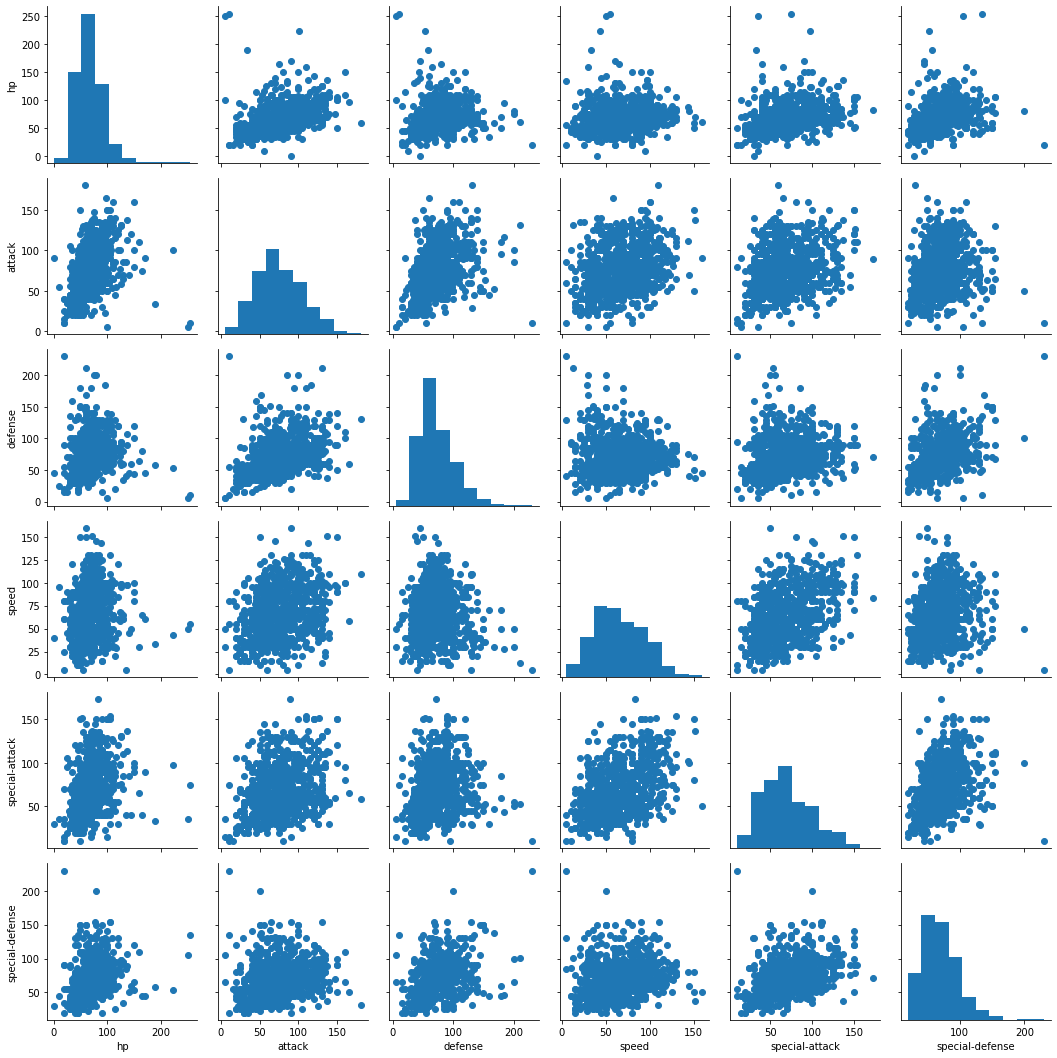

In [225]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)
g.map_diag(plt.hist) # Plots histograms on diagonals
g.map_offdiag(plt.scatter);

**Correlation Heaetmap**

For numeric variables, it can be useful to create a **correlation matrix** as part of your exploration. While it's true that the Panda's .corr function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a heat map to make it easier to see the strength of the relationships.

Instead of using the default sequential color map, a diverging color map is specified and its center is set to 0. That way, we can use hue to tell if a correlation is positive or negative, and see its strength from the hue's intensity.

In [226]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


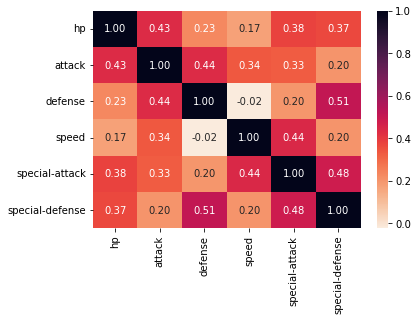

In [232]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

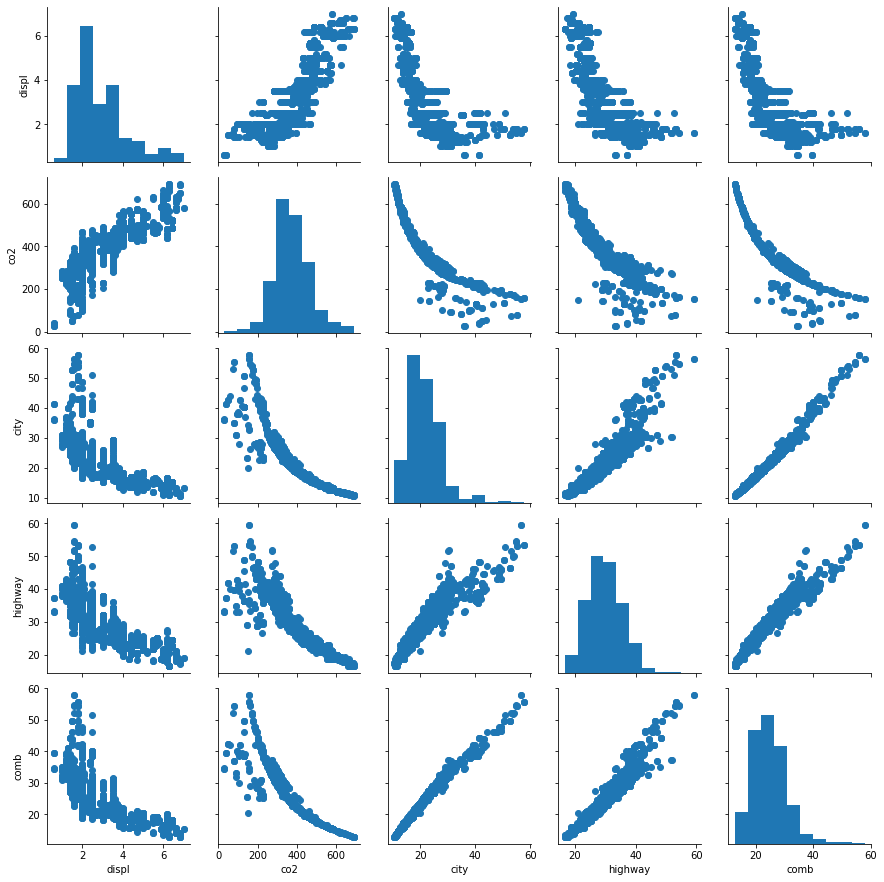

In [233]:
# YOUR CODE HERE
g = sb.PairGrid(data = fuel_econ, vars = ['displ', 'co2', 'city', 'highway', 'comb'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

I set up PairGrid to plot scatterplots off the diagonal and histograms on the diagonal. The intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the curves are. You'll explore this more in the next task.


**Task 2**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

C:\Users\Mic\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


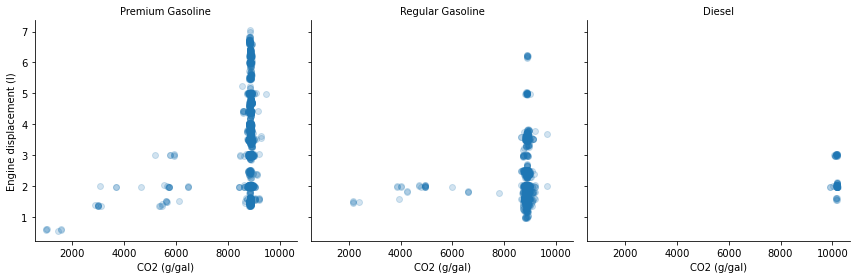

In [234]:
# YOUR CODE HERE

# data setup
fuel_econ['co2_gal'] = fuel_econ['comb'] * fuel_econ['co2']
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]

# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'fuelType', size = 4, col_wrap = 3)
g.map(sb.regplot, 'co2_gal', 'displ', y_jitter = 0.04, fit_reg = False,
scatter_kws = {'alpha' : 1/5})
g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set_titles('{col_name}') 

Due to the high number of data points and their high amount of overlap, I've chosen to plot the data in a faceted plot. You can see that engine sizes are smaller for cars that use regular gasoline against those that use premium gas. Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon. This makes sense, since a gallon of gas gets burned no matter how efficient the process. More strikingly, there's a smattering of points with much smaller emissions. If you inspect these points more closely you'll see that they represent hybrid cars that use battery energy in addition to conventional fuel! To pull these mechanically out of the dataset requires more data than that which was trimmed to create it - and additional research to understand why these points don't fit the normal CO2 bands.
